# **Assignment 10**

In [57]:
# core
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ml
from sklearn import datasets as ds
from sklearn import linear_model as lm
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split as tts

#plotly or other graphing library
import matplotlib.pyplot as plt

In [58]:
# Load dataset here once and assign to variable iris
iris= ds.load_iris()

**Q1** 

**Data set: Iris**

* Return the first 5 rows of the data including the feature names as column headings in a DataFrame and a separate Python list containing target names.

In [59]:
# iris dataframe
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [60]:
# list of target names
target_names = iris.target_names.tolist()
target_names

['setosa', 'versicolor', 'virginica']

**Q2**

**Data set: Iris**

* Fit the Iris dataset into a kNN model with neighbors=5 and predict the category of observations passed in argument new_observations. Return back the target names of each prediction (and not their encoded values, i.e. return setosa instead of 0).

In [61]:
# initiate KNN model
knn = KNN(5)
X = iris_df.values
y = iris.target

# fit model
knn.fit(X, y)

# make predictions
y_pred = knn.predict(X)
y_pred_named = [target_names[pred] for pred in y_pred]     # results with names instead of encoded values
y_pred_named

['setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'setosa',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'virginica',
 'versicolor',
 'virginica',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 'versicolor',
 '

**Q3** 15 pts

**Data set: Iris**

* Split the Iris dataset into a train / test model with the split ratio between the two established by the function parameter split.

* Fit KNN with the training data with number of neighbors equal to the function parameter neighbors.

* Generate and return back an accuracy score using the test data that was split out.

In [62]:
# split into train/test 70:30
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3, random_state=23)

# fit KNN with training data
knn = KNN(5)
knn.fit(X_train, y_train)

# predict
y_pred = knn.predict(X_test)

# return accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

1.0

**Q4**

**Data set: Iris**

* Generate an overfitting / underfitting curve of kNN each of the testing and training accuracy performance scores series for a range of neighbor (k) values from 1 to 30 and plot the curves (number of neighbors is x-axis, performance score is y-axis on the chart).

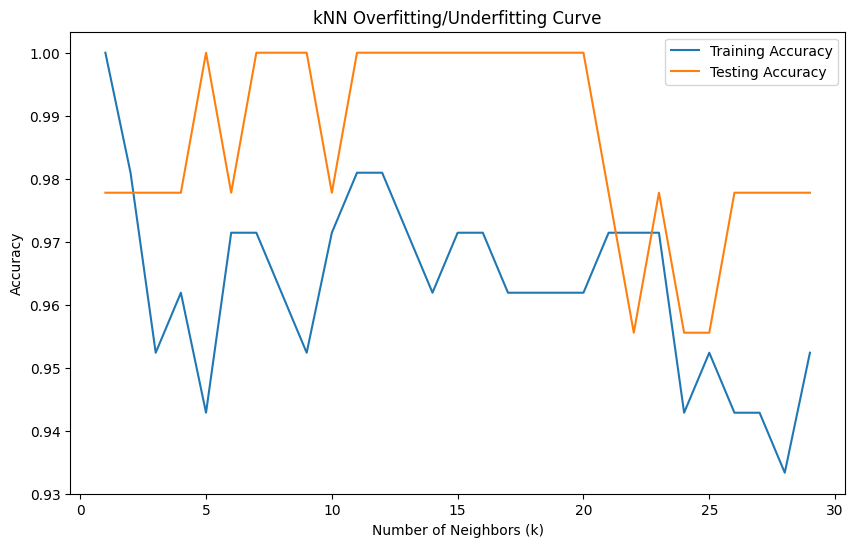

In [63]:
# initialize lists for training and testing accuracies
train_accuracy = []
test_accuracy = []

k_vals = range(1,30)

# loop through k values
for k in k_vals:
    knn = KNN(n_neighbors=k)    # initialize KNN classifier
    knn.fit(X_train, y_train)   # fit on training data
    train_accuracy.append(knn.score(X_train, y_train))  # train accuracy
    test_accuracy.append(knn.score(X_test, y_test))   # test accuracy

# plot overfitting/underfitting curves
plt.figure(figsize=(10, 6))
plt.plot(k_vals, train_accuracy, label='Training Accuracy')
plt.plot(k_vals, test_accuracy, label='Testing Accuracy')
plt.title('kNN Overfitting/Underfitting Curve')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()